# Canvas
Es el área donde vamos a proceder a dibujar nuestra visualización.    
- Posee una altura y un ancho configurable (**dimensiones**).     
- Los estilos del gráfico pueden ser predeterminados con plantillas o temas también configurables (**estilos por tema**).    


### Antes de comenzar esta sección
1. Recuerden que Seaborn esta construído encima de Matplotlib. Seaborn es una especialización de Matplotlib que me permite hacer gráficos más complejos que veremos mas adelante. Por lo que algunos métodos para personalizar el gráfico serán idénticos o muy similares.
2. Lo mismo sucede con el módulo de graficación de Pandas. 
3. Plotly, por otro lado, no tiene relación con Matplotlib. Es una librería totalmente diferente.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Preprocesamiento de datos
raw = pd.read_csv('../data/tienda_ventas.csv')
raw['fecha'] = raw['date'].apply(lambda x: x[:7])
raw['anio'] = raw['date'].apply(lambda x: x[:4])
df_2016 = raw[(raw['anio'] == '2016') & (raw['family'].isin(['SEAFOOD', 'MEATS', 'DAIRY']))]
agrupacion = df_2016[['fecha', 'family', 'sales']].groupby(['fecha', 'family']).sum()
df2 = agrupacion.reset_index(1) # Para seaborn y plotly
df = agrupacion.unstack() # Para pandas
df.columns = df.columns.droplevel() 
df

family,DAIRY,MEATS,SEAFOOD
fecha,,,
2016-01,1354875.0,591097.190342,39268.320957
2016-02,1250980.0,544954.455650,37064.826952
2016-03,1411860.0,543454.350060,39254.808992
2016-04,1427146.0,583662.446813,39353.467045
2016-05,1520885.0,591532.731223,40018.643985
2016-06,1373631.0,557547.144229,36849.899012
2016-07,1412688.0,607702.419729,39440.733051
2016-08,1330689.0,568488.623049,39486.651986
2016-09,1360984.0,564988.491109,39019.139987


In [4]:
df2

,family,sales
fecha,,
2016-01,DAIRY,1.354875e+06
2016-01,MEATS,5.910972e+05
2016-01,SEAFOOD,3.926832e+04
2016-02,DAIRY,1.250980e+06
2016-02,MEATS,5.449545e+05
2016-02,SEAFOOD,3.706483e+04
2016-03,DAIRY,1.411860e+06
2016-03,MEATS,5.434544e+05
2016-03,SEAFOOD,3.925481e+04


# Pandas

<AxesSubplot: xlabel='fecha'>

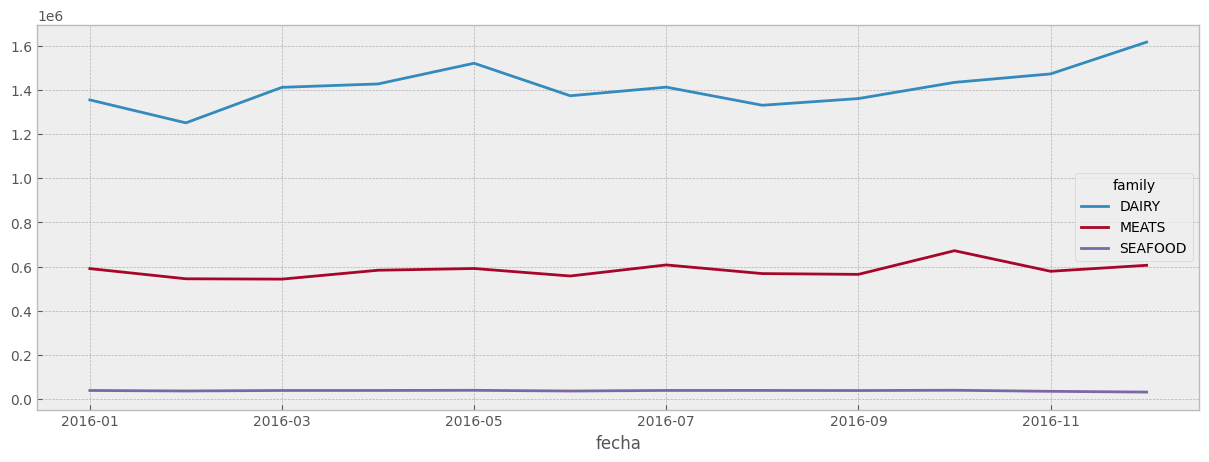

In [34]:
# DIMENSIONES - Metodo Global: Funciona para pandas, matplotlib y seaborn al mismo tiempo
# plt.rcParams["figure.figsize"] = (15,4)

# ESTILOS POR TEMA - Metodo Global: Funciona para pandas, matplotlib, y seaborn al mismo tiempo
# Todos los temas/plantillas disponibles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use(
    'bmh' # grayscale, ggplot
)

df.plot.line(
    figsize=(15, 5) # Dimensiones en pulgadas -> (ancho, alto)
)

# Seaborn

<AxesSubplot: ylabel='sales'>

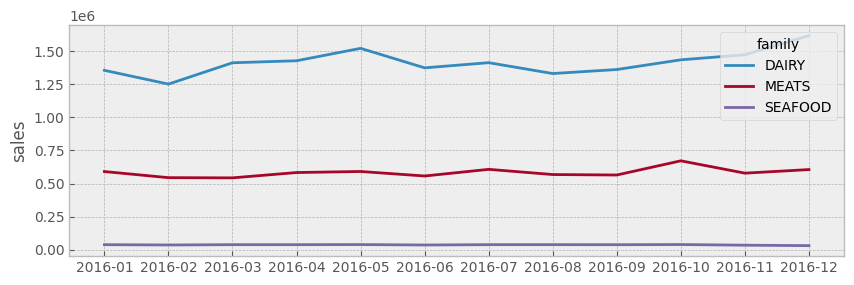

In [35]:
# Dimensiones en pulgadas -> (ancho, alto)
plt.figure(
    figsize=(10, 3)
)

sns.lineplot(
    df2,
    x=df2.index.values,
    y='sales',
    hue='family'
)

# Plotly

In [36]:
fig = px.line(
    df2, 
    x=df2.index.values,
    y="sales",
    color='family',
    width=800, # DIMENSIONES del ancho en pixeles
    height=300,  # DIMENSIONES del alto en pixeles
    template='ggplot2' # ESTILOS POR TEMA: https://plotly.com/python/templates/
)
fig.show()

In [37]:
# Todos los temas/plantillas disponibles en plotly:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']